In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy import ndimage
from scipy.interpolate import griddata
from IPython.display import display, Markdown, Latex

%matplotlib inline

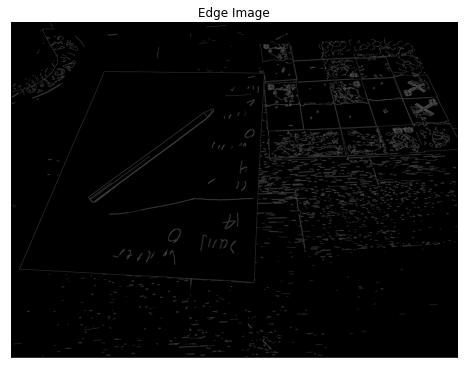

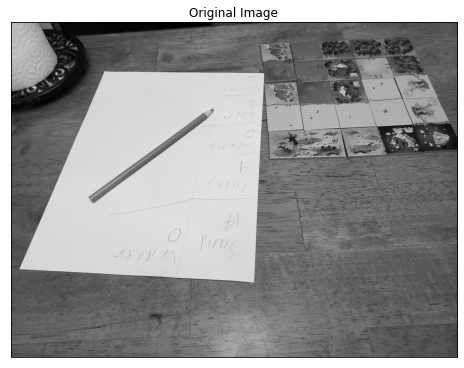

In [4]:
# Some test data to work out the kinks.

corners = {
    "195508": [ (2568, 2769), (2074, 1984), (2975, 1686), (3750, 2294) ],
    "195451": [ (1521, 672), (605, 1354), (1964, 2064), (2632, 1126)],
    "195443": [ (322, 1373), (1547, 1646), (1956, 673), (931, 522)],
    "193723": [ (958, 1805), (3176, 1730), (2702, 887), (1312, 920) ],
    "193726": [ (102, 2437), (2549, 2204), (2213, 817), (593, 888) ],
    "193728": [ (1671, 1962), (3600, 2242), (3064, 911), (1677, 499) ],
    "193743": [ (2078, 1316), (3255, 1312), (3034, 697), (2099, 703) ],
    "195431": [ (344, 2326), (2719, 1997), (2232, 732), (567, 795) ],
    "195506": [ (491, 1677), (2185, 2115), (2656, 776), (1293, 617) ],    
    
    "193745": [ (2326, 1232), (4038,1149), (3571, 133), (2242, 194)],
    "193730": [ (685, 2102), (2520, 1714), (2367, 495), (1045, 888)],
    "193734": [ (813, 2594), (2743, 2515), (2548, 830), (937, 859)],
    "193753": [ (1239, 1730), (2255, 2718), (3271, 1693), (2201, 1094)],
    "195436": [ (366, 1898), (1656, 1936), (1777, 852), (662, 850)],
    "193748": [ (1788, 1540), (3120, 1528), (2879, 727), (1821, 722)],
    "193747": [ (1111, 1879), (2928, 1809), (2656, 611), (1255, 627)],
    "195447": [ (1251, 1962), (2540, 1834), (2259, 863), (1123, 875)],
    "193756": [ (2065, 1160), (2846, 1065), (3424, 1677), (2532, 1859)],
    "193759": [ (834, 2689), (3552, 2838), (3296, 545), (1189, 504)],
    "195439": [ (950, 2284), (2693, 2094), (2354, 1024), (1049, 1090)]  ,
    
    "132857": [ (656, 1553), (3569, 1607), (2920, 499), (1222, 425) ],
    "132858": [ (1177, 2474), (3110, 2433), (2792, 1148), (1425, 1173) ],
    "132900": [ (966, 1978), (3024, 2082), (2598, 768), (1098, 421) ],
    "132903": [ (491, 2557), (1871, 2284), (1978, 999), (941, 1355) ],
    "132905": [ (-17, 1432), (2577, 2082), (2456, 660), (688, 121) ],
    "134426": [ (516, 1718), (3209, 1590), (2615, 640), (987, 673) ],
    "134428": [ (805, 2895), (3705, 1668), (2288, 380), (289, 698) ],
    "134431": [ (1462, 1350), (2648, 1309), (2420, 867), (1530, 879) ],
    "134434": [ (466, 1987), (1821, 1759), (1507, 1305), (508, 1396) ],
    "134436": [ (789, 2086), (2701, 2234), (2792, 929), (1421, 1008) ],
    "134441": [ (884, 1706), (2858, 1437), (2420, 392), (1016, 557) ],
    "134443": [ (867, 1743), (2606, 1879), (2656, 983), (1408, 933) ],
    "134446": [ (685, 1933), (2408, 2156), (2648, 747), (1276, 751) ],
    "134449": [ (1050, 3094), (3876, 1919), (2579, 44), (484, 745) ],
    "135920": [ (768, 1615), (3081, 1590), (2668, 342), (1098, 384) ],
    "135922": [ (-29, 2408), (2730, 2247), (2152, 917), (479, 875) ],
    "135924": [ (206, 2520), (1871, 2201), (1916, 1177), (772, 1462) ],
    "135929": [ (904, 1276), (2474, 2239), (3259, 896), (1958, 388) ],
    "135934": [ (739, 1611), (2751, 2119), (2879, 1049), (1512, 809) ],
    "135938": [ (871, 2234), (3606, 2193), (3036, 1103), (1437, 1181) ],
    "135942": [ (1177, 2396), (3205, 2470), (2982, 1069), (1549, 1103) ],
    "135943": [ (541, 1825), (2172, 1929), (2210, 974), (1024, 900) ],
    "135947": [ (272, 2726), (3738, 2520), (3011, 119), (656, 227) ],
    "135952": [ (355, 2168), (2429, 2565), (2573, 772), (974, 541) ],
    "140316": [ (104, 2518), (1977, 2497), (1799, 1075), (340, 1096) ]
}

tile_res = 128
ctr = 0
for file in os.listdir('dev_images/'):
    ctr = ctr + 1
    #if ctr < 12: continue
    label = (file.split("_")[1].split("."))[0]
    board = cv2.pyrDown(cv2.pyrDown(cv2.cvtColor(cv2.imread("dev_images/" + file), cv2.COLOR_BGR2GRAY)))
    board = cv2.cvtColor(cv2.imread("dev_images/" + file), cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(board,(9, 9),0)
    edges = cv2.Canny(blur, 50, 100)   
    plt.figure(figsize=(8,8))
    plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.imshow(board,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    break
    
    


In [697]:
# This is naive O(n^2) algorithm
# do not run
if False:
    ptr = 0
    ys, xs = np.mgrid[0:edges.shape[0], 0:edges.shape[1]]
    mask = edges > 0

    yys, xxs = ys[mask], xs[mask]

    rhoC = np.zeros(yys.shape[0]*(yys.shape[0] - 1) // 2)
    thetaC = np.zeros(yys.shape[0]*(yys.shape[0] - 1) // 2)

    for i in range(xxs.shape[0]):
        x, y = xxs[i], yys[i]

        m = (y - yys) / (x - xxs)
        b = yys - m * xxs

        theta = np.arctan2( y - yys, x - xxs )
        rho = b * np.sin(theta)

        size = len(theta[(i+1):])
        thetaC[ptr:(ptr + size)] = theta[(i+1):]
        rhoC[ptr:(ptr + size)] = rho[(i+1):]
        ptr = ptr + size                

In [8]:
import math

ys, xs = np.mgrid[0:edges.shape[0], 0:edges.shape[1]]
mask = edges > 0

yys, xxs = ys[mask], xs[mask]

# This is wikipedia's sketch implementation
thetas = np.linspace(-math.pi, math.pi - 1e-8, 720)
theta_dicts = { angle:{} for angle in thetas }

sin_theta = np.sin(thetas)
cos_theta = np.cos(thetas)
rhos = np.expand_dims(xxs, axis=1) * np.expand_dims(cos_theta, axis=0)
rhos += np.expand_dims(yys, axis=1) * np.expand_dims(sin_theta, axis=0)

In [9]:
def roundRho(t):
    return 2*np.round(t/2)

In [10]:
rhos2 = list(set(list(roundRho(rhos.flatten()).astype('int'))))
revRhos = { x: i for i, x in enumerate(rhos2) }
accumulator = np.zeros((len(rhos2), len(thetas)))

In [11]:
for i, theta in enumerate(thetas):
    for r in roundRho(rhos[:, i]).astype('int'):
        accumulator[revRhos[r], i] += 1

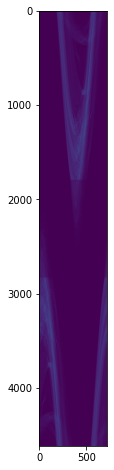

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(accumulator)

In [13]:
test = accumulator.flatten()
test = sorted(test)
idx = np.where(accumulator >= test[-40])
results2 = []
for x, y in zip(idx[0], idx[1]):
    results2.append( (rhos2[x], thetas[y]) )
print(results2)

[(432, 1.5860891903241932), (444, 1.5773504068788808), (950, 0.4063534252070249), (952, 0.4063534252070249), (1092, 1.524917706207007), (1394, 1.5161789227616946), (1688, 0.9394192153710792), (1694, 0.9306804319257669), (1716, 0.9394192153710792), (1748, 0.9306804319257669), (1748, 0.9394192153710792), (1750, 0.9306804319257669), (1754, 0.9306804319257669), (1756, 0.9219416484804546), (2220, 1.6297831075507556), (2300, 0.048063303949218206), (2302, 0.048063303949218206), (-2306, -3.089159952917919), (-2294, -3.0978987363632315), (-2224, -1.5161789327616941), (-2222, -1.5161789327616941), (-1890, -1.7608648692304403), (-1758, -2.215281608386683), (-1754, -2.2065428249413706), (-1752, -2.215281608386683), (-1752, -2.2065428249413706), (-1748, -2.2065428249413706), (-1716, -2.2065428249413706), (-1690, -2.2065428249413706), (-1688, -2.1978040414960582), (-1286, -1.5948279837695054), (-1104, -1.6210443341054426), (-1078, -1.61230555066013), (-958, -2.730869831660112), (-946, -2.73960861510

In [14]:
thetas[56]

-2.652220780652301

In [15]:
test = blur.copy()
for rho,theta in results2:
    a = np.cos(theta)
    b = np.sin(theta)
    x1 = -100
    y1 = int((rho - a*x1) / b)
    x2 = blur.shape[1] + 100
    y2 = int((rho - a*x2) / b)
    print("Drawing line with rho, theta {0}".format((rho, theta)))

    cv2.line(test,(x1,y1),(x2,y2),(0,0,255),2)

Drawing line with rho, theta (432, 1.5860891903241932)
Drawing line with rho, theta (444, 1.5773504068788808)
Drawing line with rho, theta (950, 0.4063534252070249)
Drawing line with rho, theta (952, 0.4063534252070249)
Drawing line with rho, theta (1092, 1.524917706207007)
Drawing line with rho, theta (1394, 1.5161789227616946)
Drawing line with rho, theta (1688, 0.9394192153710792)
Drawing line with rho, theta (1694, 0.9306804319257669)
Drawing line with rho, theta (1716, 0.9394192153710792)
Drawing line with rho, theta (1748, 0.9306804319257669)
Drawing line with rho, theta (1748, 0.9394192153710792)
Drawing line with rho, theta (1750, 0.9306804319257669)
Drawing line with rho, theta (1754, 0.9306804319257669)
Drawing line with rho, theta (1756, 0.9219416484804546)
Drawing line with rho, theta (2220, 1.6297831075507556)
Drawing line with rho, theta (2300, 0.048063303949218206)
Drawing line with rho, theta (2302, 0.048063303949218206)
Drawing line with rho, theta (-2306, -3.089159952

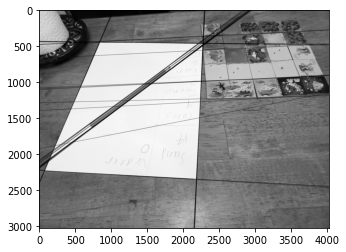

In [16]:
plt.imshow(test, cmap="gray")

In [17]:
# find intersection of lines
N = len(results2)
X = np.zeros((N,N))
Y = np.zeros((N,N))
eps = np.finfo(np.float32).eps

for i in range(N):
    rho1, theta1 = results2[i]
    a, b, c = np.cos(theta1), np.sin(theta1), rho1
    
    for j in range(i + 1, N):
        rho2, theta2 = results2[j]
        d, e, f = np.cos(theta2), np.sin(theta2), rho2
        
        if (np.abs(b*d - a*e) < eps):
            X[i, j] = 99999
            Y[i, j] = 99999
            print("Skipping parallel lines {0}".format((i, j)))
            continue
        
        y = (-f*a + c*d) / (b*d - a*e)
        x = (c - y*b) / a  
        
        if x >= 0 and x < test.shape[1] and y >= 0 and y < test.shape[0]:
            print("Skipping lines with internal intersection {0} @ {1}".format((i, j), (x, y)))
            continue
        
        print("Line 1 {0}x + {1}y = {2} and {3}x + {4}y = {5}, intersects at x={6}, y={7}".format(a,b,c,d,e,f,x,y))
        
        assert( np.abs(a*x + b*y - c) < eps )
        assert( np.abs(d*x + e*y - f) < eps )
        
        X[i, j] = x
        #X[j, i] = x
        Y[i, j] = y
        #Y[j, i] = y

Skipping lines with internal intersection (0, 1) @ (1368.32686398164, 452.97778865636394)
Skipping lines with internal intersection (0, 2) @ (842.7594323791101, 444.9397310149854)
Skipping lines with internal intersection (0, 3) @ (844.9224984811106, 444.9728130687135)
Line 1 -0.015292267441665643x + 0.9998830664415177y = 432 and 0.045862527695828756x + 0.9989477606728739y = 1092, intersects at x=10801.419709598418, y=597.248037287154
Line 1 -0.015292267441665643x + 0.9998830664415177y = 432 and 0.054590253576717665x + 0.9985088403286321y = 1394, intersects at x=13778.600323560955, y=642.7812038132023
Skipping lines with internal intersection (0, 6) @ (2222.4303165955002, 466.0404945452681)
Skipping lines with internal intersection (0, 7) @ (2210.6041659398825, 465.85962473688664)
Skipping lines with internal intersection (0, 8) @ (2268.89543765287, 466.75113470086893)
Skipping lines with internal intersection (0, 9) @ (2299.193435736222, 467.21451397509406)
Skipping lines with interna

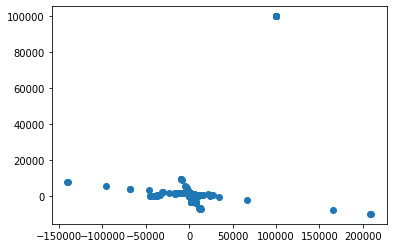

In [18]:
plt.figure()
# set axes range
#plt.xlim(-5200, -300)
#plt.ylim(0, 800)
plt.scatter(X.flatten(), Y.flatten())

In [19]:
def distancesqr(x,y):
    ex = np.power( x - X, 2 )
    ey = np.power( y - Y, 2 )
    return ex + ey

In [20]:
NC = 10
rx = np.random.uniform( np.min(X), np.max(X), NC )
ry = np.random.uniform( np.min(Y), np.max(Y), NC )
clusters = np.array([ (x, y) for x, y in zip(rx, ry) ])
print(clusters)
while True:
    R = np.zeros((X.shape[0], X.shape[1], NC))
    for i, (cx, cy) in enumerate(clusters):
        R[:,:,i] = distancesqr(cx, cy)
    mR = np.min(R, axis = 2)
    assign = np.zeros(X.shape, 'int')
    counts = np.zeros(NC)
    for i in range(NC):
        assign[ mR == R[:, :, i] ] = i
        counts[i] = np.sum(assign == i)
    print(counts)

    newClusters = np.zeros(clusters.shape)
    for i in range(NC):
        if len(X[assign == i]) == 0: continue
        newClusters[i, 0] = np.mean(X[assign == i])
        newClusters[i, 1] = np.mean(Y[assign == i])
    print(newClusters)
    print(np.sum((newClusters - clusters)**2))
    if np.sum((newClusters - clusters)**2) < 1000: break
    clusters = newClusters
    

[[112688.02569198   2711.30533967]
 [-49839.38786268  78768.14900368]
 [179217.28198611  -2775.59908522]
 [152172.83149835  65890.9300567 ]
 [-20123.61280997   -301.76360725]
 [-55456.95478882  69112.090389  ]
 [-19687.16992622  78488.23276527]
 [ 91180.80273661  49187.72047751]
 [ 56842.40481092  36086.92763083]
 [ -1608.87687447  13595.06675251]]
[1.600e+03 0.000e+00 3.000e+00 0.000e+00 4.400e+01 3.000e+00 0.000e+00
 3.000e+01 1.000e+00 1.519e+03]
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.94470807e+05 -9.23598301e+03]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.42428034e+04  1.28010092e+03]
 [-1.25386439e+05  6.84974661e+03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 9.99990000e+04  9.99990000e+04]
 [ 6.63450179e+04 -2.23111831e+03]
 [ 4.68089978e+02  3.84847065e+00]]
68908263722.61311
[1600. 1443.    3. 1443.   27.    3. 1443.   30.    2.   92.]
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.94470807e+05 -9.23598301e+03]
 [ 0.00000

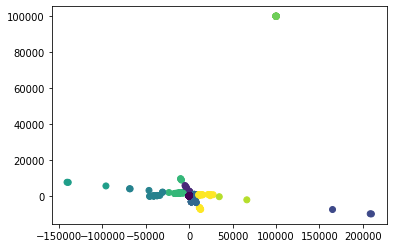

In [21]:
plt.scatter(X.flatten(), Y.flatten(),c = assign.flatten())

In [22]:
# Find x and y pairs that correspond to a given cluster.
matches = np.where(assign == 5)
matches2 = set([line for line in list(matches[0])])
print(matches2)

test = blur.copy()
for i, (rho,theta) in enumerate(results):
    if i not in matches2: continue
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    #rint("Drawing line with rho, theta {0}".format((rho, theta)))

    cv2.line(test,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(test, cmap="gray")

{4}


NameError: name 'results' is not defined

In [494]:
X

array([[   0.        ,  -67.94230551,    0.        , ...,  375.61326286,
         -71.86432269,  -69.24967794],
       [   0.        ,    0.        , -347.09884208, ..., -513.26308669,
         -69.2549814 ,  -66.62973014],
       [   0.        ,    0.        ,    0.        , ..., -181.59325806,
         483.04392461, -626.45619886],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         151.41209608,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  -70.559702  ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [306]:
[line for line in list(matches[1]) + list(matches[0])]

[13, 15, 16, 3, 4, 5, 3, 4, 5, 13, 15, 16]